# Zero-Mean Chroma and Luma by Block Size

In this notebook, we revisit the [Zero-Mean Chroma and Luma](https://github.com/luctrudeau/CfL-Analysis/blob/master/notebooks/exploratory/0.01a-luctrudeau-ZeroMeanChromaAndLuma.ipynb) experiment but with different block sizes to examine the impact on correlation.

In [1]:
%matplotlib inline

# Load the "autoreload" extension so that code can change
%load_ext autoreload

# Always reload modules so that as you change code in src, it gets loaded
%autoreload 2

import load_paths
from src.data import make_kodim

import matplotlib.pyplot as plt
import numpy as np

[kodims, kodim_files] = make_kodim.load_kodim()
num_kodim = len(kodim_files)

block_sizes = [4,8,16,32]

corrU = []
corrV = []

for b in range(0, 4):
    block_size = block_sizes[b]
    corrU.append([])
    corrV.append([])
    
    for k in range(0, num_kodim):
        im = kodims[k]
        height, width, z = im.shape
        plot_width = width // block_size
        plot_height = height // block_size
        
        for y in range(0, height, block_size):
            for x in range(0, width, block_size):
                bY = im[y:y+block_size, x:x+block_size, 0].ravel()
                bU = im[y:y+block_size, x:x+block_size, 1].ravel()
                bV = im[y:y+block_size, x:x+block_size, 2].ravel()
                
                avgY = np.mean(bY)
                avgU = np.mean(bU)
                avgV = np.mean(bV)
                
                dY = bY - avgY
                dU = bU - avgU
                dV = bV - avgV
                
                corr = np.corrcoef(dY, dU)
                c = abs(corr[0,1])
                corrU[b].append(1 if np.isnan(c) else c)
                
                corr = np.corrcoef(dY, dV)
                c = abs(corr[0,1])
                corrV[b].append(1 if np.isnan(c) else c)

/usr/lib/python3.6/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/lib/python3.6/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


## dY vs. dU

For each block in each image, we compute the correlation between the zero-mean Y values along and the U values. The following boxplot shows the minimum, first quartile, median, third quartile and the maximum absolute correlation coefficient by block size.

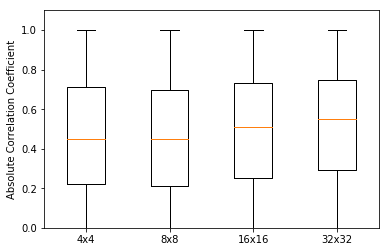

In [2]:
plt.boxplot((np.asarray(corrU[0]), np.asarray(corrU[1]), np.asarray(corrU[2]), np.asarray(corrU[3])), labels=['4x4','8x8', '16x16', '32x32']);
plt.gca().set_ylim([0, 1.1]);
plt.ylabel("Absolute Correlation Coefficient");

## dY vs. dV

For each block in each image, we compute the correlation between the zero-mean Y values along and the V values. The following boxplot shows the minimum, first quartile, median, third quartile and the maximum absolute correlation coefficient by block size.

In [3]:
plt.boxplot((corrV[0].ravel(), corrV[1].ravel(), corrV[2].ravel(), corrV[3].ravel()), labels=['4x4','8x8', '16x16', '32x32']);
plt.gca().set_ylim([0, 1.1]);
plt.ylabel("Absolute Correlation Coefficient");

AttributeError: 'list' object has no attribute 'ravel'

Surprisingly, the correlation increases with the block size (with the exception of 4x4 to 8x8). It is important to notice that as the block size increases, fewer samples make up the distribution. This could partially explain this phenomena. Correlation might also not be the best metric to evaluate blocks, as the relation between luma and chroma is not necessarily linear.  